$${\Huge \textbf{Практическое задание по ОММ}}
$$



$${\Huge \textbf{Вариант 5}}
$$



$${\Huge \textbf{Автор: Корнев Артем, гр 329}}
$$
$${\Huge \textbf{Постановка задачи:}}
$$


Решить задачу, используя схему бегущего счета и итерационные методы:


$$\frac{\partial u}{\partial t} + (2u + t) \frac{\partial u}{\partial x} = 0,\:0 < x \leq 1
$$ 

$$u(x;0) = 1 + x, \quad u(0;t) = \frac{2 - t^2}{4t + 2}
$$


Построение характеристик

В точках пересечения проекций его характеристик, решение будет разрывным. Посмотрим как будут вести себя проекции характеристик в заданных областях. Уравнение характеристик будет иметь вид:

$$\begin{align*}
\frac{dt}{1}&=\frac{dx}{(2u + t)}=\frac{du}{0}\\
\end{align*}
$$

отсюда

$$\begin{cases}
u = u(x_0, t_0) = \text{const} \\
x - x_0  =  2u(t - t_0) + \frac{t^2 - t_0^2}{2}
\end{cases}
$$

получаем два семейства кривых, используя НУ и ГУ

$$\begin{cases}
1) \quad t_0=0 \quad x=x_0+2\cdot (1+x_0)\cdot t+\frac{t^2}{2} \\
2) \quad x_0=0 \quad x=2\cdot \frac{(2-t_0^2)}{(4\cdot t_0+2)}\cdot (t-t_0)+\frac{t^2-t_0^2}{2}
\end{cases}
$$

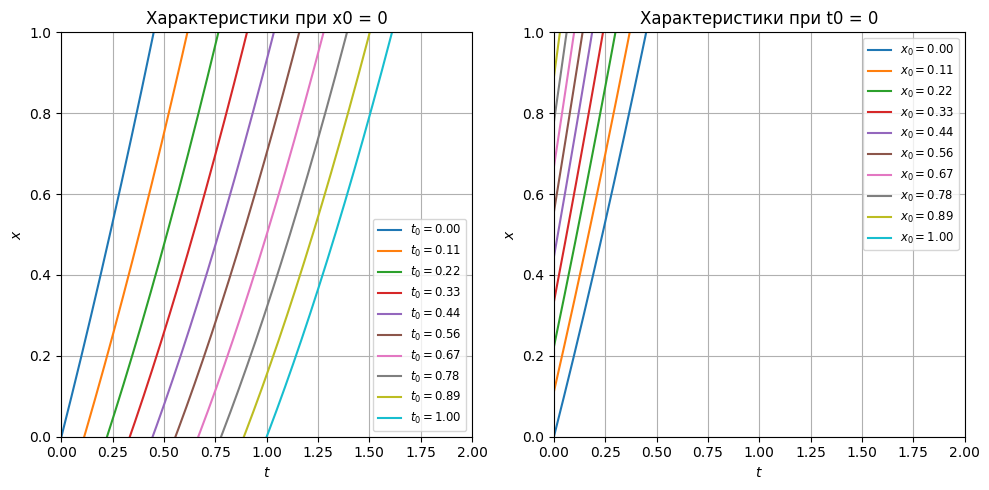

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функции для вычисления значений x в зависимости от t и t0 для каждого уравнения
def calculate_x_first(t, t0):
    return 2 * ((2 - t0 ** 2) / (4 * t0 + 2)) * (t - t0) + ((t ** 2 - t0 ** 2) / 2)

def calculate_x_second(x0, t):
    return x0 + 2 * (1 + x0) * t + t**2 / 2

# Создание значений t
t_values = np.linspace(0, 2, 1000)

# Создание графика для разных значений t0 для первого уравнения
num_t0_values = 10
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Создание двух соседних графиков
for t0 in np.linspace(0, 1, num_t0_values):
    x_values = calculate_x_first(t_values, t0)
    axs[0].plot(t_values, x_values, label=f'$t_0 = {t0:.2f}$')

# Создание графика для разных значений x0 для второго уравнения
num_x0_values = 10
for x0 in np.linspace(0, 1, num_x0_values):
    x_values = calculate_x_second(x0, t_values)
    axs[1].plot(t_values, x_values, label=f'$x_0 = {x0:.2f}$')

# Настройка области изменения осей x и y
for ax in axs:
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)

# Настройка общих параметров
for ax in axs:
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x$')
    ax.grid(True)
    ax.legend(fontsize='small')

# Установка заголовка для каждого графика
axs[0].set_title('Характеристики при x0 = 0')
axs[1].set_title('Характеристики при t0 = 0')

plt.tight_layout()  # Распределение графиков равномерно
plt.show()


Как видно на заданном отрезке (0;1] характеристики не пересекаются.

$${\Huge \textbf{Метод решения}}
$$

Введём в области $\Omega=(x,t): 0 < x\leq 1, 0<t\leq 2$ сетку с шагом $h$ по $x$ и шагом $\tau$ по $t$:
\
\begin{aligned}
&x_n = n\cdot h, \quad h = \frac{1}{N-1}, \quad n=0, N-1, \\
&t_m = m\cdot \tau, \quad \tau = \frac{1}{M-1}, \quad m=0, M-1.
\end{aligned}
\
На $\omega_{h,\tau}$ будем рассматривать сеточную функцию $y_{mn}=u(x_n,t_m)$.

$${\Huge \textbf{Шаблон}}
$$

Будем использовать четырехточечный шаблон ( прямоугольник ) , так
как он имеет серьезные преимущества над
трехточечным шаблоном: имеет порядок аппроксимации $O(τ^2 + h^2)$ и 
абсолютно устойчив при любом выборе шагов по сетке.

Перепишем исходное уравнение, приведя его к дивергентному виду:

$$\frac{\partial u}{\partial t} + \frac{\partial (u^2 + t\cdot u)}{\partial x} = 0$$

В таком случае разностная аппроксимация нашего уравнения в точке $(x_{n} + 0,5h; t_{m} + 0,5τ)$ имеет следующий вид:

$$
\frac{y_{m+1,n} - y_{mn} + y_{m+1,n+1} - y_{mn+1}}{2\tau} + \frac{F_{m+1,n} - F_{mn} + F_{m+1,n+1} - F_{mn+1}}{2h} = 0
$$

где
$$
F_{mn} = F(y_{mn}) = (y_{mn}^2 + t \cdot y_{mn})
$$
При начальных условиях:
$$\left\{
\begin{array}{ll}
y_{0n}(x;0) = 1 - Nh, \\
y_{m0}(0;t) = \frac{2-(M\tau)^2}{4 \cdot M\tau + 2}.
\end{array}
\right.
$$


$${\Huge \textbf{Cхема бегущего счета}}
$$

Данную задачу будем решать при помощи схемы бегущего счета. Значение сеточной функции $y_{n+1,m+1}$ неизвестно, но нам известны все значения, соответствующие начальному $y_{n0}$ и граничному $y_{0m}$ условиям. Таким образом, зная значения в трех соседних точках: $y_{00}$, $y_{10}$, $y_{01}$, мы можем численно найти значение в четвертой точке $y_{11}$. Зная это значение, мы можем найти по трем известным точкам либо $y_{12}$, либо $y_{21}$. И так далее, заполняя найденными значениями сетку. Также начальное и граничное условия:

$$\left\{
\begin{array}{ll}
y_{0n}(x;0) = 1 - Nh, \\
y_{m0}(0;t) = \frac{2-(M\tau)^2}{4 \cdot M\tau + 2}.
\end{array}
\right.
$$

Это неявное уравнение относительно $y_{m+1,n+1}$. Будем решать его итерационным методом Ньютона.


$$y_{m+1,n+1}^{(k+1)} = y_{m+1,n+1}^{(k)} - \frac{F(y_{m+1,n+1}^{(k)})}{F'(y_{m+1,n+1}^{(k)})}
$$


До достижения заданной точности $$ \epsilon: \\
|y_{m+1,n+1}^{(k+1)} - y_{m+1,n+1}^{(k)}| \leq \epsilon
$$

$${\Huge \textbf{Исполняемый код}}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N, M = 100, 1000  # количество x, t
X, T = 1, 10

y = np.zeros((N, M), dtype=float)
x, t = np.linspace(0, 1, N), np.linspace(0, T, M)

h = float(X) / (N - 1)
τ = float(T) / (M - 1)

eps = 0.01  # невязка

y[:, 0] = 1 + x
y[0, :] = (2 - t ** 2) / (4 * t + 2)


def p(u, t):
    return u ** 2 + t * u



def Dp(u, t):
    return 2 * u + t


def f(x, a, b, t):
    return (x - a) / τ + (p(x, t) - p(b, t)) / h


def Df(x, t):
    return 1 / τ + Dp(x, t) / h


def solve(a, b, t):
    result = b  # начальное приближение
    d = eps + 1  # чтобы цикл запустился
    while (d > eps):
        y = result
        result = y - f(y, a, b, t) / Df(y, t)
        d = abs(result - y)
    return result


for i in range(1, N):
    for j in range(1, M):
        y[i, j] = solve(y[i, j - 1], y[i - 1, j], τ * j)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t_grid, x_grid = np.meshgrid(t, x)

surf = ax.plot_surface(x_grid, t_grid, y, cmap='spring')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

plt.show()
